![banner cnns ppgcc ufsc](http://www.lapix.ufsc.br/wp-content/uploads/2019/04/VC2.png)



<a href="https://colab.research.google.com/drive/1bnZKt0ROKOrIlE3LPamhSTqh4xZNR_Y1"><img align="left"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>&nbsp; &nbsp;<a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/License-CC-BY-ND-4.0-orange.png" alt="Creative Commons 4.0 License" title="Creative Commons 4.0 License"></a>&nbsp; &nbsp; <a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/Jupyter-Notebook-v.1.0-blue.png" alt="Jupyter Version" title="Jupyter Version"></a>&nbsp; &nbsp;<a href=""><img align="left"  src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/Python-v.3.7-green.png" alt="Python Version" title="Python Version"></a>

### Info on Jupyter Notebooks

Look here: 
 * [LAPIX::Jupyter Notebooks na UFSC (Seminário para Professores do INE2019.1)](http://www.lapix.ufsc.br/jupyter-notebooks-na-ufsc/)
 * [LAPIX::Como Importar Jupyter Notebooks de GitHub para Google Colab?](http://www.lapix.ufsc.br/ensino/como-importar-jupyter-notebooks-de-github-para-google-colab/)

# Initializations

### Checking where you're running...

In [16]:
!uname -a
!cat /etc/lsb-release

Linux note 4.15.0-58-generic #64~16.04.1-Ubuntu SMP Wed Aug 7 14:10:35 UTC 2019 x86_64 x86_64 x86_64 GNU/Linux
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=16.04
DISTRIB_CODENAME=xenial
DISTRIB_DESCRIPTION="Ubuntu 16.04.6 LTS"


### Cloning the ***Computer Vision*** repository from a Git

If you're running this at your computer or using Google Colab but **not** using your Google Drive, this is the way to use these notebooks!

In [ ]:
# To clone from our personal Github mirror (may be out of sync):
!git clone https://github.com/awangenh/vision

In [ ]:
# To clone from UFSC's Institutional Gitlab (always the latest version):
!git clone https://codigos.ufsc.br/aldo.vw/vision

### Mount your Google Drive as a Folder

If you're using Google Colab together with your Google Drive, adapt this code below to point to the place where you've copied our Git in your Google Drive:

In [ ]:
# Code to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Look at the contents of your Drive:

In [ ]:
!ln -s "/content/drive/My Drive"

### Common Initializations

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Example in the Domain of Values: Simple Car Detector

## 1. Naïve Approach

### Initialize and load first image: Street with Cars

3
3.png
../data/shot0004.png
../data/shot0004.png
4
4.png
../data/shot0005.png
../data/shot0005.png
5
5.png
../data/shot0006.png
../data/shot0006.png
6
6.png
../data/shot0007.png
../data/shot0007.png
7
7.png
../data/shot0008.png
../data/shot0008.png
8
8.png
../data/shot0009.png


C:\Users\gudeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\gudeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\gudeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

../data/shot0009.png
9
9.png
../data/shot0010.png
../data/shot0010.png
10
10.png
../data/shot0011.png
../data/shot0011.png
11
11.png
../data/shot0012.png
../data/shot0012.png
12
12.png
../data/shot0013.png
../data/shot0013.png
13
13.png
../data/shot0014.png
../data/shot0014.png
14
14.png
../data/shot0015.png
../data/shot0015.png


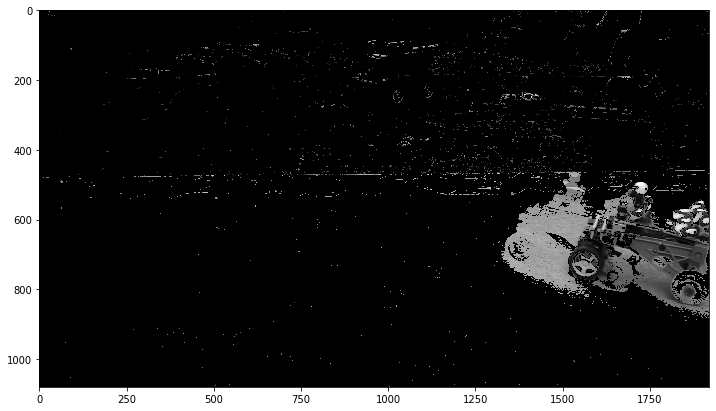

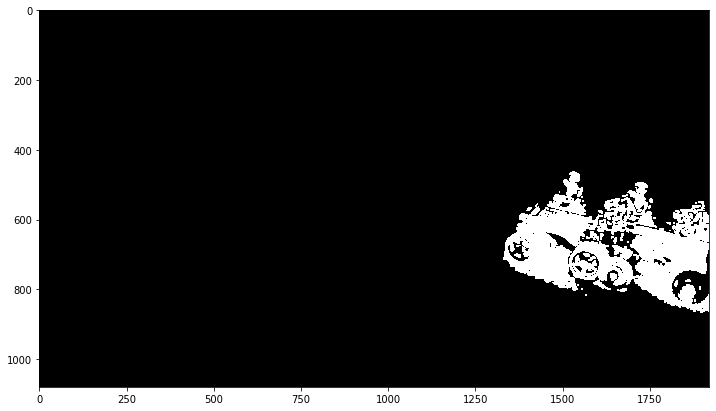

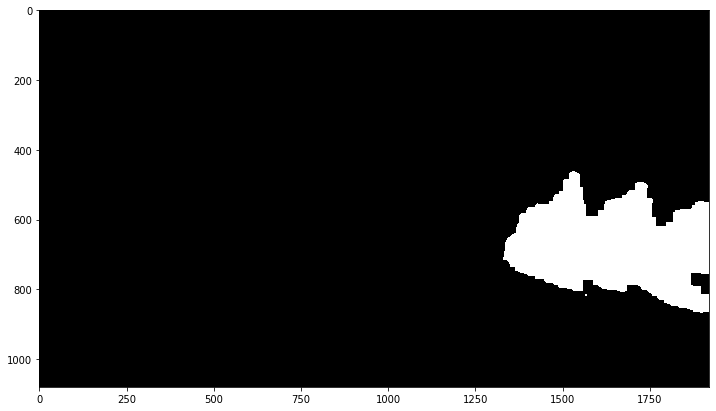

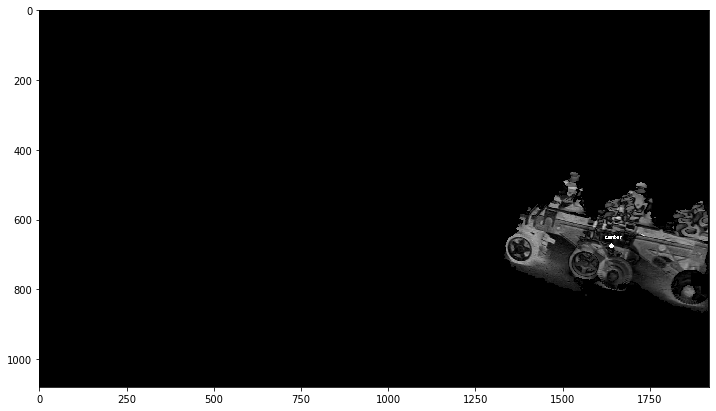

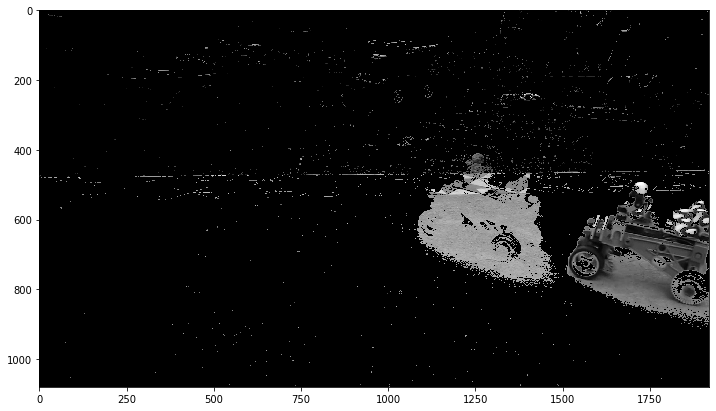

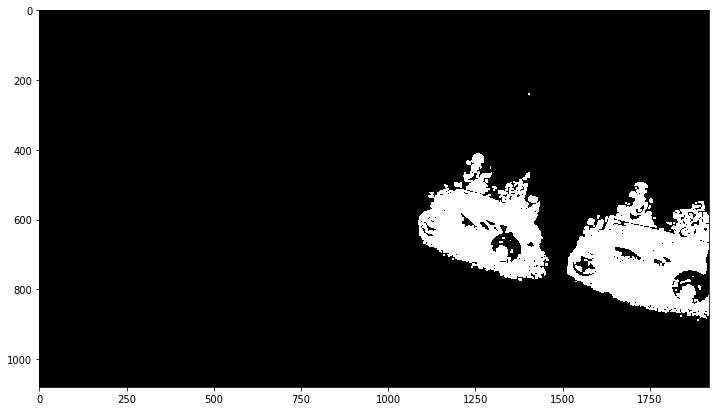

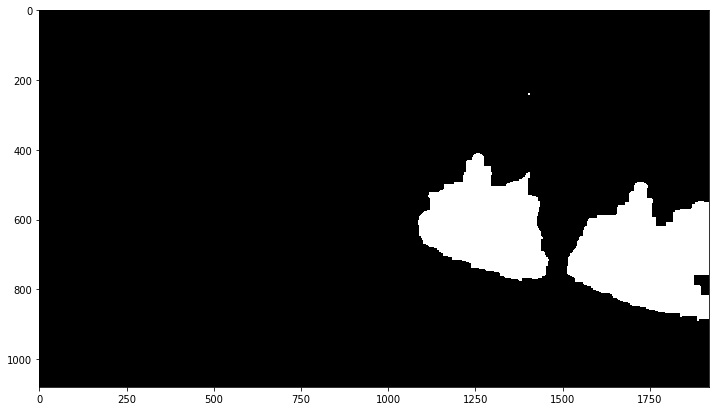

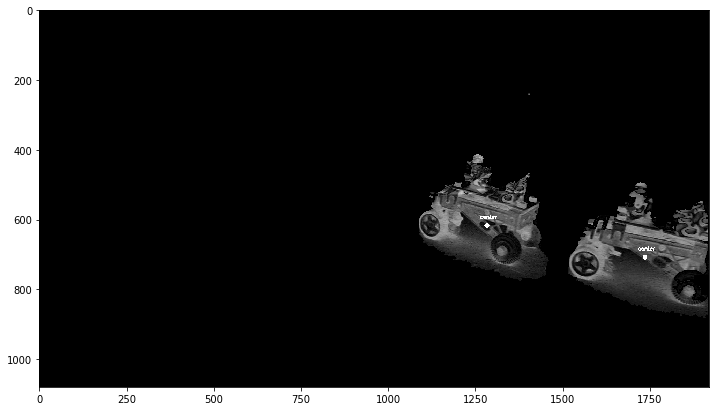

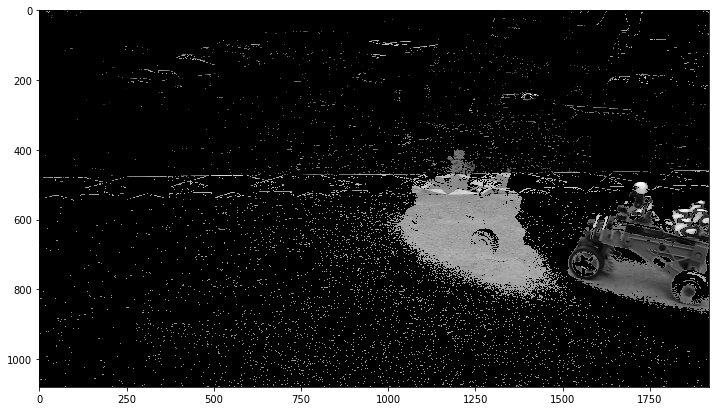

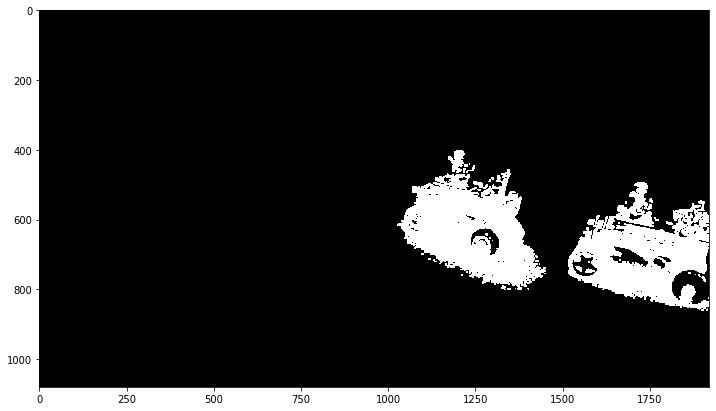

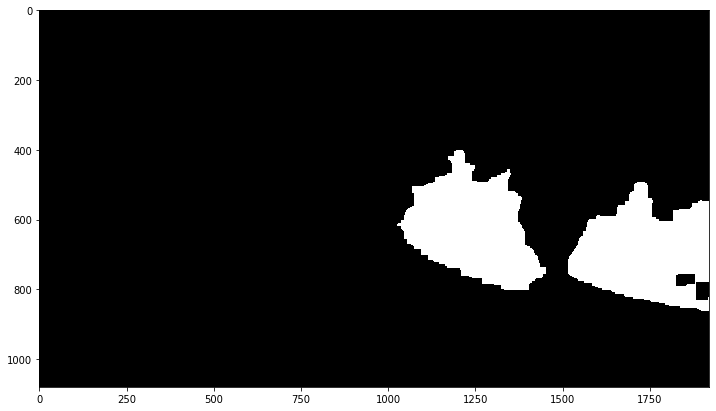

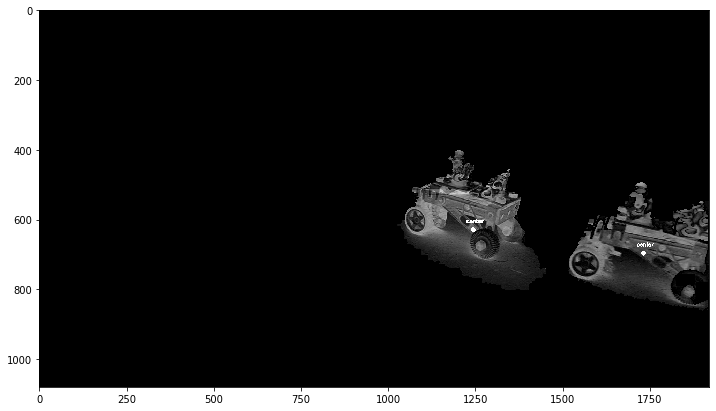

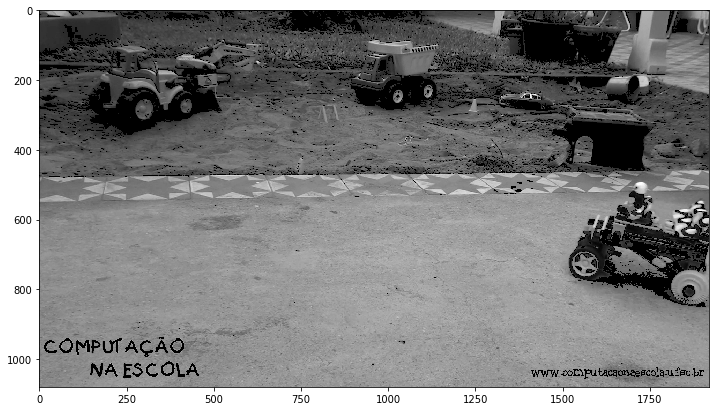

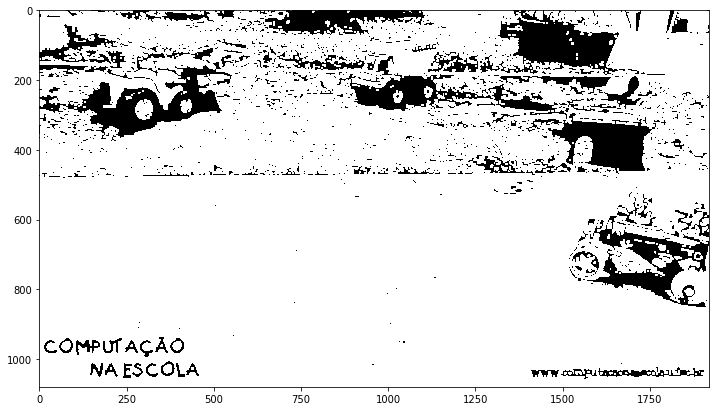

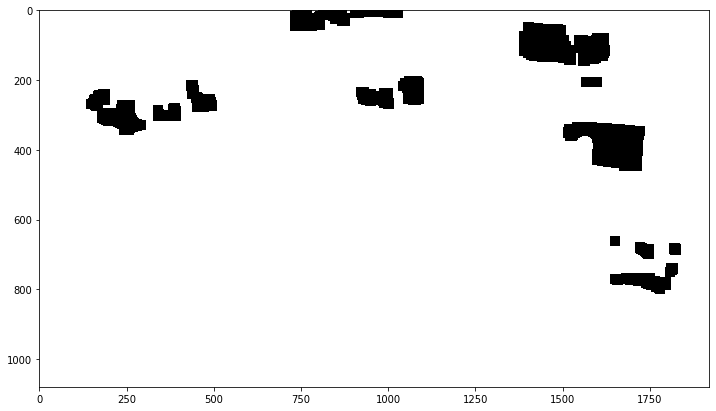

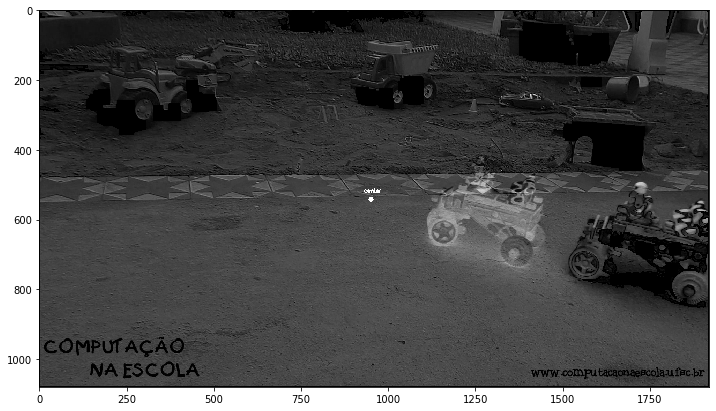

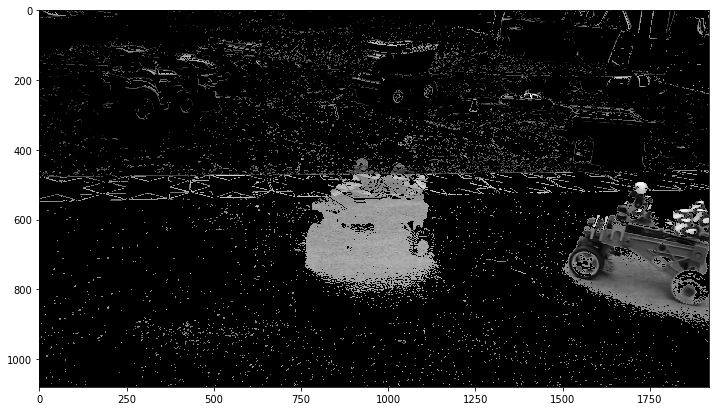

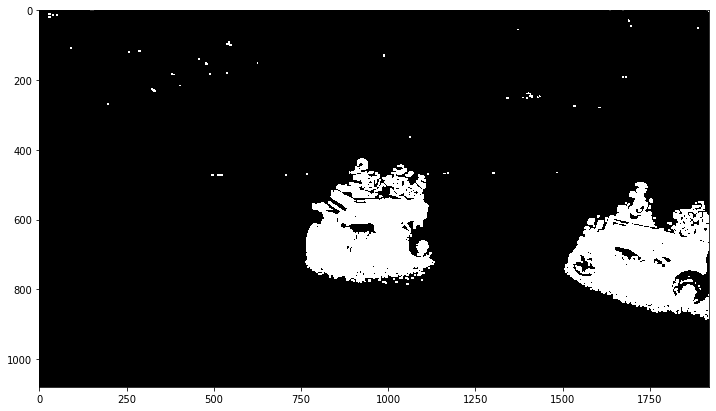

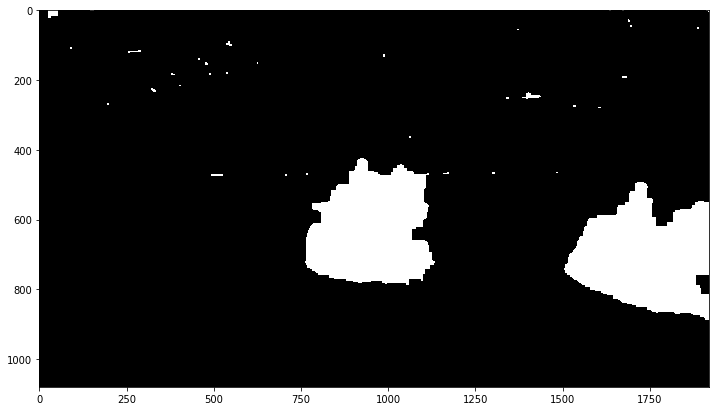

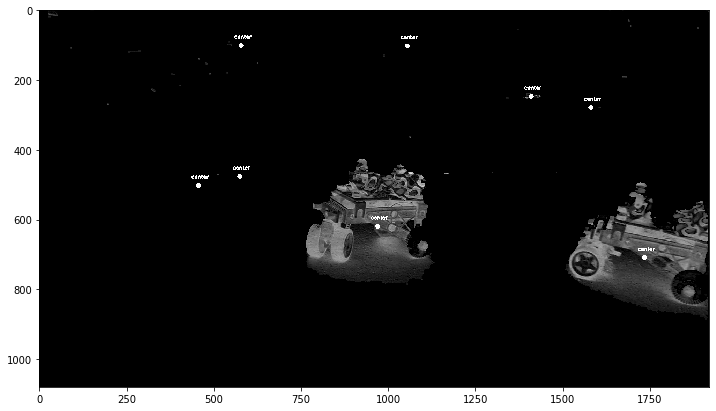

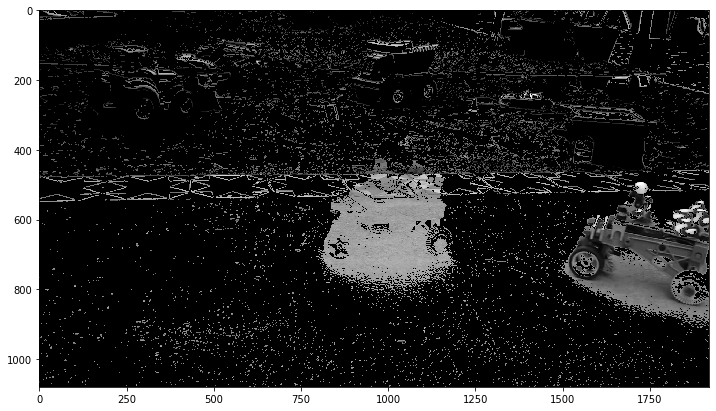

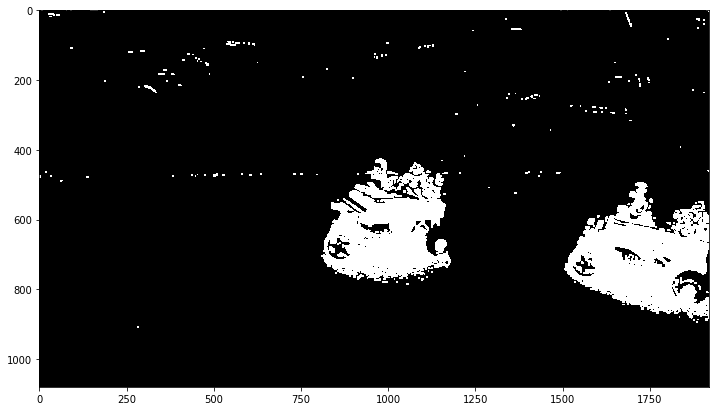

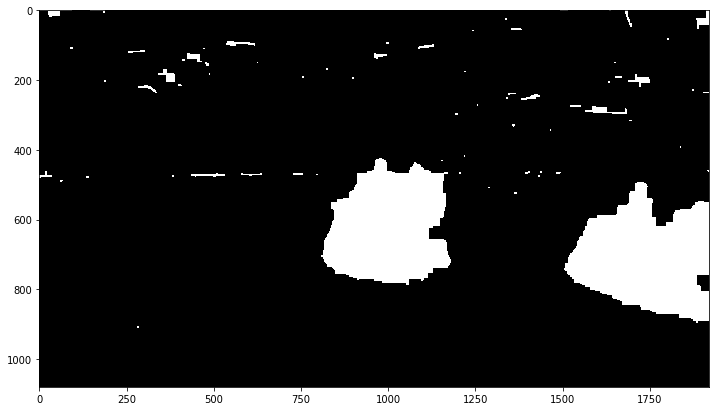

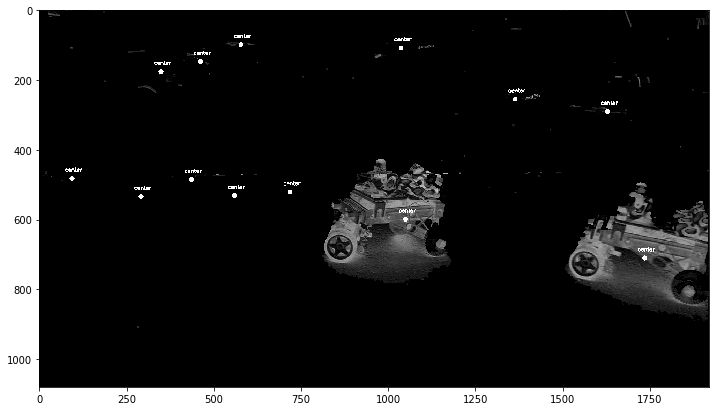

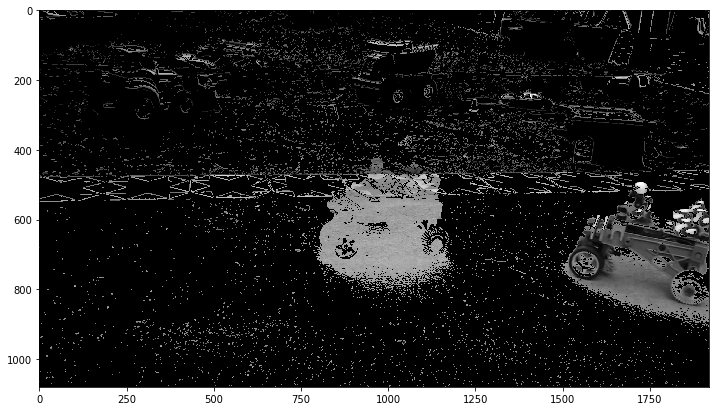

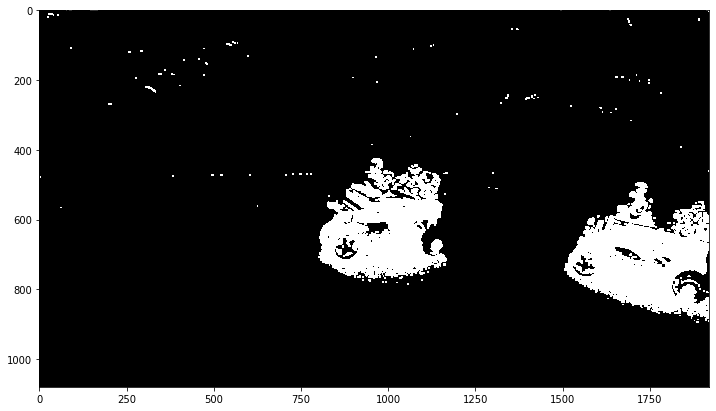

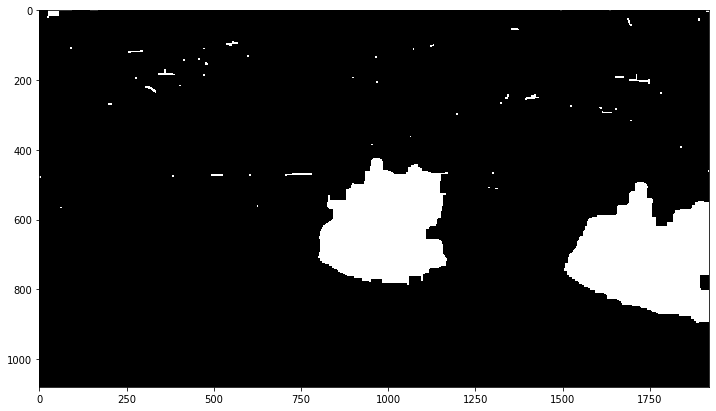

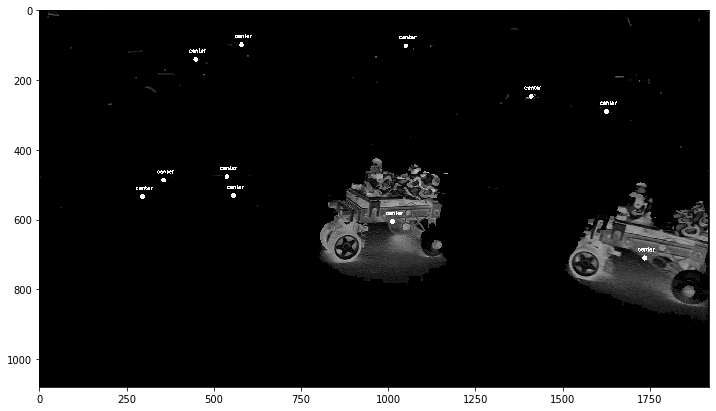

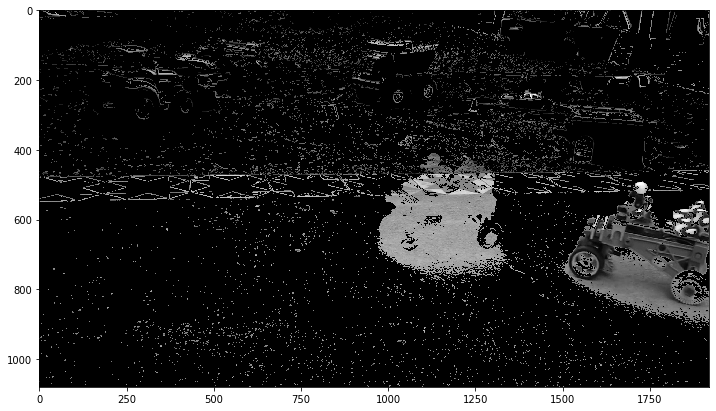

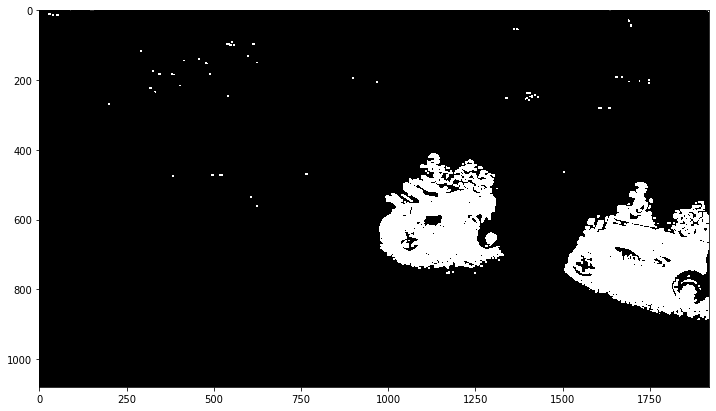

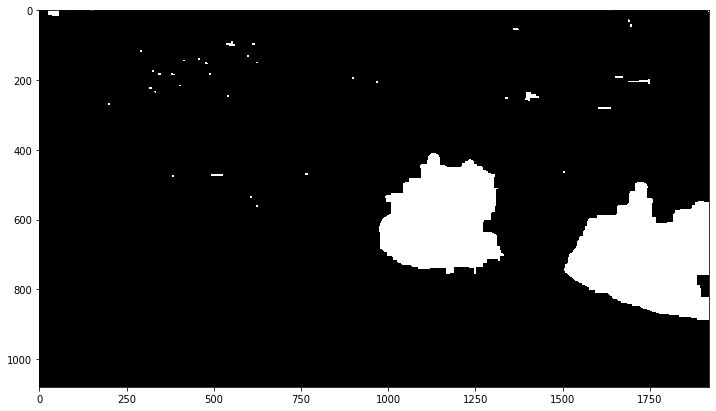

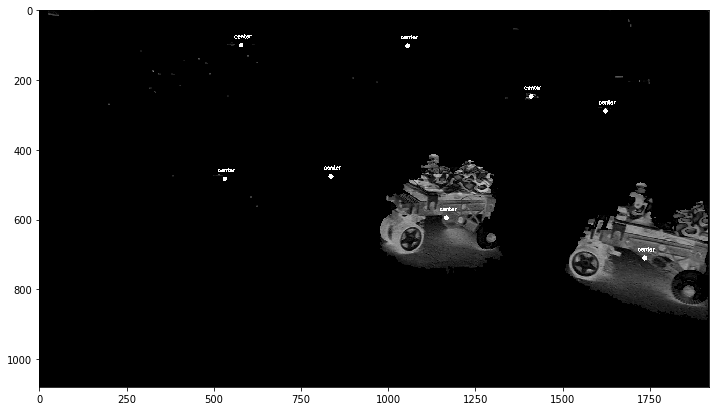

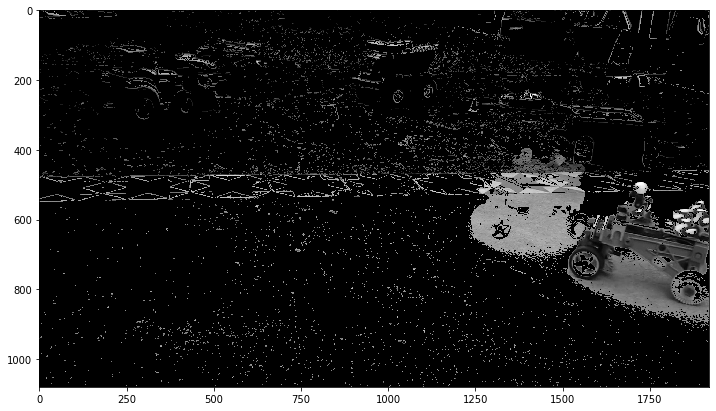

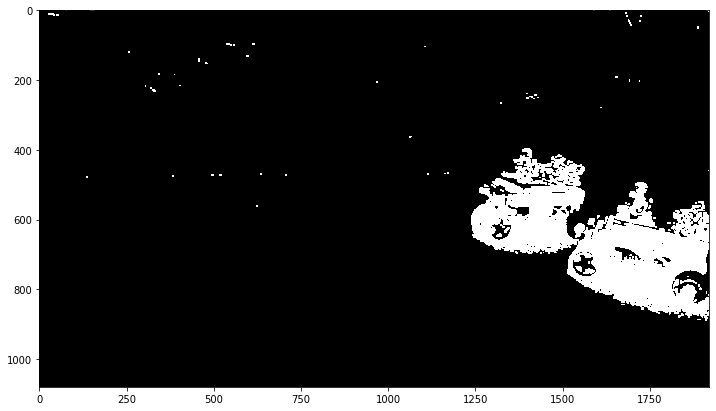

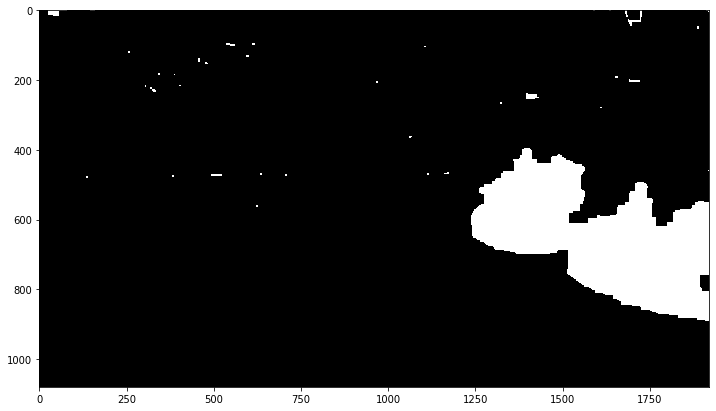

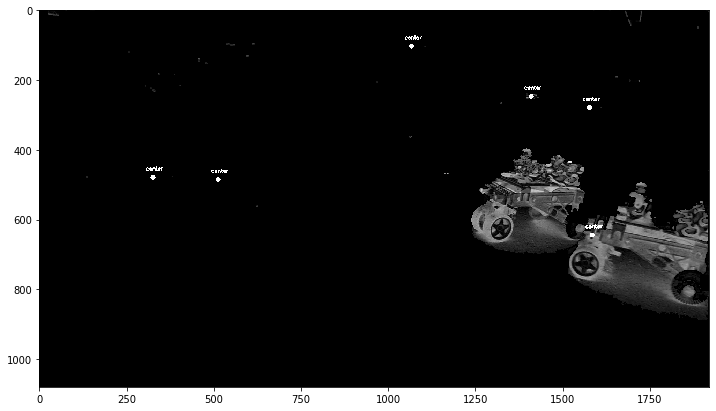

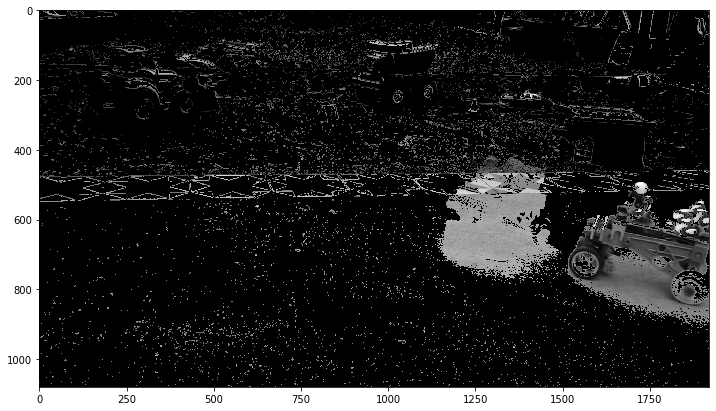

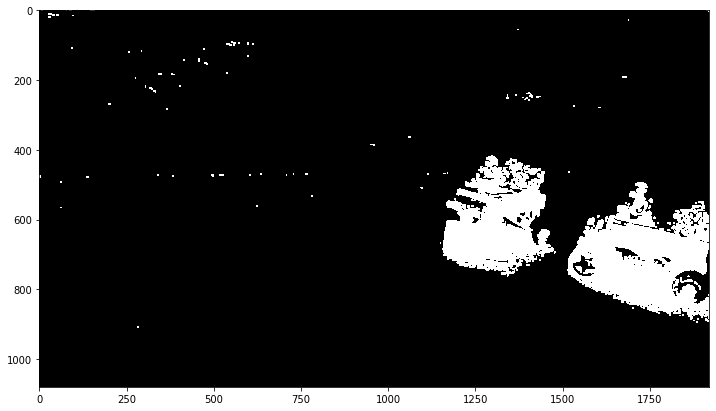

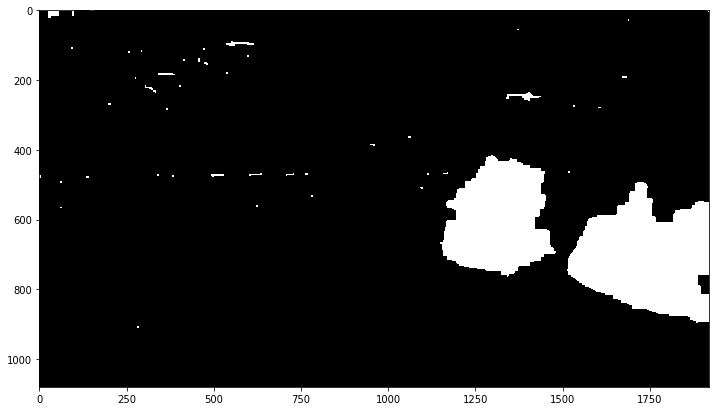

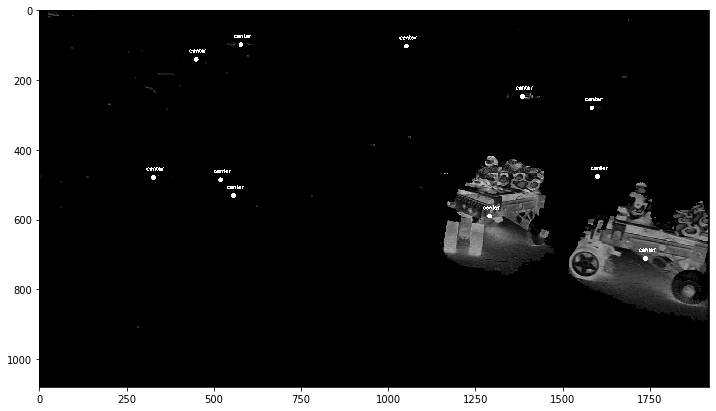

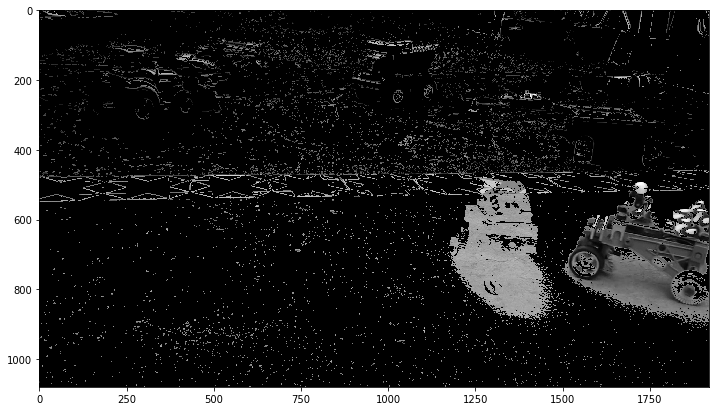

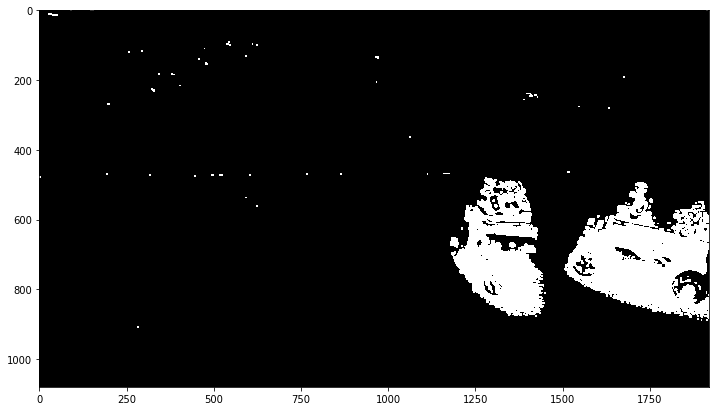

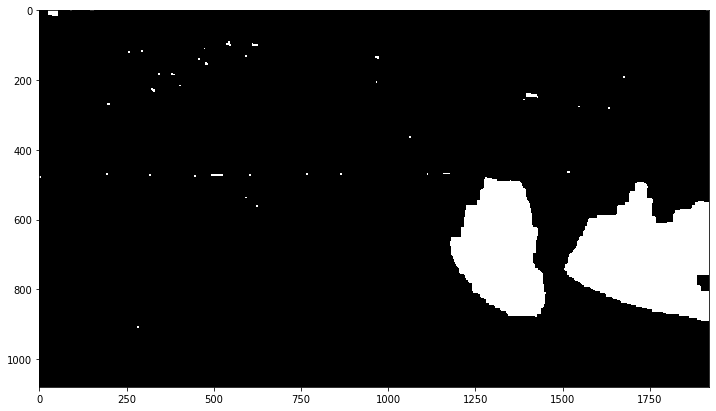

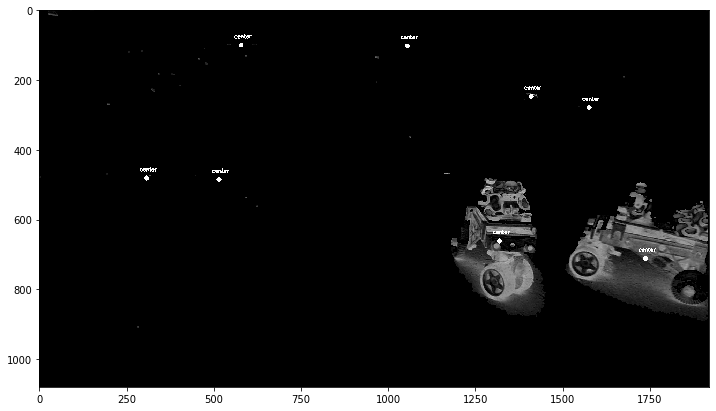

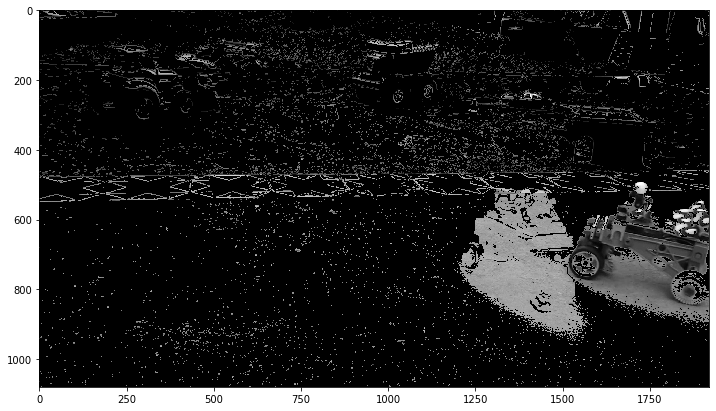

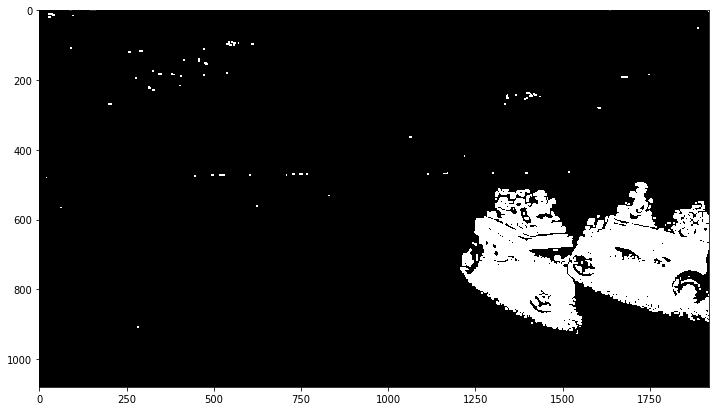

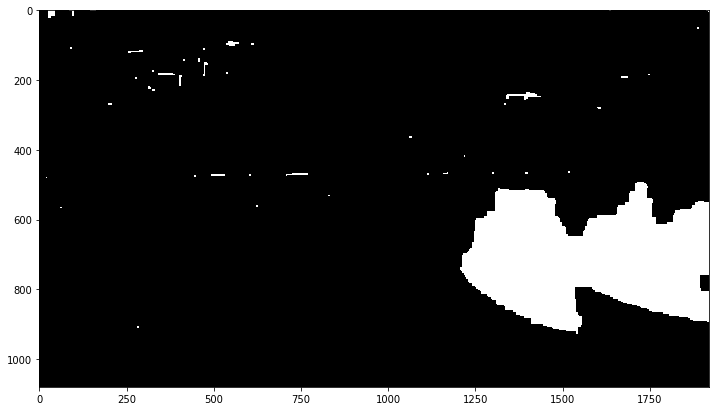

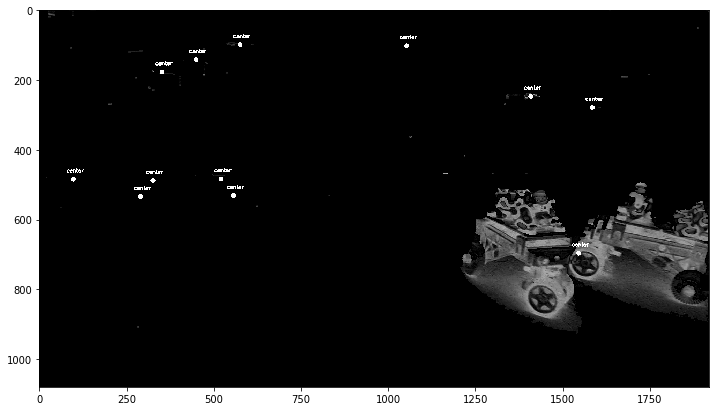

In [60]:
import cv2
import matplotlib
import numpy as np
import imutils
from matplotlib import pyplot as plt
# Import interaction widgets and functions
from ipywidgets import interact, interactive, interact_manual

# Load the image in color (OpenCV standard = BGR)

orig = cv2.imread("../data/shot0003.png", cv2.IMREAD_COLOR)
# Convert to RGB
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# Load the image in grayscale
gray = cv2.imread("../data/shot0003.png", cv2.IMREAD_GRAYSCALE)

# fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
# ax = axes.ravel()
# ax[0].imshow(orig)
# ax[1].imshow(gray, 'gray')


#accumulator=cv2.imread("../data/shot0003.png",cv2.IMREAD_COLOR)
second_name="../data/shot0004.png"
for x in range(3,15):#15):
    print(x)
    if x!=9:
        second_name=second_name.replace(str(x)+".png",str(x+1)+".png")
    else:
        second_name=second_name.replace("0"+str(x)+".png",str(x+1)+".png")
    print(str(x)+".png")
    print(second_name)

    
    # Load the image in color (OpenCV standard = BGR)
    ref_orig = cv2.imread(second_name, cv2.IMREAD_COLOR)
    # Convert to RGB
    ref_orig = cv2.cvtColor(ref_orig, cv2.COLOR_BGR2RGB)

    # Load the image in grayscale
    ref_gray = cv2.imread(second_name, cv2.IMREAD_GRAYSCALE)

#     fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
#     ax = axes.ravel()
#     ax[0].imshow(ref_orig)
#     ax[1].imshow(ref_gray, 'gray')

    # Calculate the absolute difference between two images
    # Image order is irrelevant since we will discard the sign
    change = cv2.absdiff(gray, ref_gray)
    #change = cv2.absdiff(orig, ref_orig)

#     plt.figure(figsize = (16,12))
#     plt.imshow(change, 'gray')

    modes = ['cv2.THRESH_BINARY',
             'cv2.THRESH_BINARY_INV',
             'cv2.THRESH_TRUNC',
             'cv2.THRESH_TOZERO',
             'cv2.THRESH_TOZERO_INV']
    
    adaptModes = ['cv2.ADAPTIVE_THRESH_MEAN_C',
              'cv2.ADAPTIVE_THRESH_GAUSSIAN_C']

  #  Basic threshold example
    def my_threshold(thresh, modeStr):
        global change
        global dst
        mode = eval(modeStr)
        th, dst = cv2.threshold(change, thresh, 255, mode)
        #dst = cv2.adaptiveThreshold(change, 255, adaptMode, mode, neighborhood, 10)
        
        #fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
        #ax = axes.ravel()
        #ax[0].imshow(change,'gray')
        #ax[1].imshow(dst,'gray')

    # Pass function & its parameters to interactive
    # interactive(my_threshold, thresh = (0, 255), modeStr=modes)
    my_threshold(19, 'cv2.THRESH_BINARY')
    
    # Basic threshold example
#     def my_adaptThreshold(adaptModeStr, modeStr, neighborhood):
#         global change
#         global dst
#         mode = eval(modeStr)
#         adaptMode = eval(adaptModeStr)
#         dst = cv2.adaptiveThreshold(change, 255, adaptMode, mode, 1001, 10)
#         fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
#         ax = axes.ravel()
#         ax[0].imshow(change,'gray')
#         ax[1].imshow(dst,'gray')

# #     # Pass function & its parameters to interactive
#     my_adaptThreshold('cv2.ADAPTIVE_THRESH_MEAN_C', 'cv2.THRESH_BINARY', 15)


    masked = cv2.multiply(gray, (dst//255))
#     plt.figure(figsize = (12,10))
#     plt.imshow(masked, 'gray')

    kernel = np.ones((5,5),np.uint8)
    kernel

    opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)
#     plt.figure(figsize = (12,10))
#     plt.imshow(opening, 'gray')

    kernel2 = np.ones((29,29),np.uint8)
    kernel2

    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)
#     plt.figure(figsize = (12,10))
#     plt.imshow(closing, 'gray')


    #masked_with_morpho = cv2.multiply(gray, (closing//255))
    masked_with_morpho2 = cv2.multiply(change, (closing//255))

    #plt.figure(figsize = (12,10))
    # plt.imshow(masked_with_morpho, 'gray')
    #plt.imshow(masked_with_morpho2, 'gray')
    # fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
    # ax = axes.ravel()
    # ax[0].imshow(masked_with_morpho,'gray')
    # ax[1].imshow(masked_with_morpho2,'gray')

    # find contours in the thresholded image
    thresh = cv2.threshold(dst, 60, 255, cv2.THRESH_BINARY)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    #print(cnts)

    # loop over the contours
    for c in cnts:
        # compute the center of the contour
        if cv2.contourArea(c) > 900:
            M = cv2.moments(c)
            # process the contour
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # draw the contour and center of the shape on the image
            cv2.drawContours(masked_with_morpho2, [c], -1, (0, 255, 0), 2)
            cv2.circle(masked_with_morpho2, (cX, cY), 7, (255, 255, 255), -1)
            cv2.putText(masked_with_morpho2, "center", (cX - 20, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    print(second_name)
    # Set the size to show
    plt.figure(figsize = (12,10))
    plt.imshow(masked_with_morpho2, 'gray')
    
    #accumulator = cv2.add(accumulator,masked_with_morpho2)
    
    #accumulator=cv2.accumulate(masked_with_morpho2,accumulator)
    #plt.figure(figsize = (12,10))
    #plt.imshow(accumulator, 'gray')

In [ ]:
# Other Functions

### Adaptive Thresholds in OpenCV

In [2]:
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
# Import interaction widgets and functions
from ipywidgets import interact, interactive, interact_manual

modes = ['cv2.THRESH_BINARY',
         'cv2.THRESH_BINARY_INV',
         'cv2.THRESH_TRUNC',
         'cv2.THRESH_TOZERO',
         'cv2.THRESH_TOZERO_INV']

adaptModes = ['cv2.ADAPTIVE_THRESH_MEAN_C',
              'cv2.ADAPTIVE_THRESH_GAUSSIAN_C']

# Set the figure size, remembering that matplotlib 
# uses INCHES and not pixels...
matplotlib.rcParams['figure.figsize'] = [8,8]
 
# Read image
src = cv2.imread("../data/ct-01.jpg", cv2.IMREAD_GRAYSCALE)
  
# Basic threshold example
def my_adaptThreshold(adaptModeStr, modeStr, neighborhood):
    global src
    mode = eval(modeStr)
    adaptMode = eval(adaptModeStr)
    dst = cv2.adaptiveThreshold(src, 255, adaptMode, mode, neighborhood, 10)
    fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(src,'gray')
    ax[1].imshow(dst,'gray')

# Pass function & its parameters to interactive
interactive(my_adaptThreshold, adaptModeStr=adaptModes, modeStr=modes, neighborhood=(3,31,2))



interactive(children=(Dropdown(description='adaptModeStr', options=('cv2.ADAPTIVE_THRESH_MEAN_C', 'cv2.ADAPTIV…

### Adaptive Thresholds in SciKit

SciKit only can do mean-based adaptive thresholding. 

What is SciPy and what are SciKits in Python?
 * [SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering](https://www.scipy.org/)
 * [SciPy Toolkits are add-on packages for SciPy](https://www.scipy.org/scikits.html)
   * [scikit-image is a collection of algorithms for image processing](https://scikit-image.org/)
   * [scikit-learn are sSimple and efficient tools for data mining and data analysis](https://scikit-learn.org/stable/)

In [50]:
import cv2
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_local
# Import interaction widgets and functions
from ipywidgets import interact, interactive, interact_manual

image = data.page()
# Read image
# image = cv2.imread("../data/ct-01.jpg", cv2.IMREAD_GRAYSCALE)



block_size = 35

# Basic threshold example
def my_scikitAdaptThreshold(neighborhood):
    global image
    
    global_thresh = threshold_otsu(image)
    binary_global = image > global_thresh

    binary_adaptive = threshold_local(image, neighborhood, offset=10)

    fig, axes = plt.subplots(ncols=3, figsize=(20, 8))
    ax0, ax1, ax2 = axes
    plt.gray()

    ax0.imshow(image)
    ax0.set_title('Image')

    ax1.imshow(binary_global)
    ax1.set_title('Global thresholding')

    ax2.imshow(binary_adaptive)
    ax2.set_title('Adaptive thresholding')

    for ax in axes:
        ax.axis('off')

    plt.show()
    
# Pass function & its parameters to interactive
interactive(my_scikitAdaptThreshold, neighborhood=(3,31,2))

interactive(children=(IntSlider(value=17, description='neighborhood', max=31, min=3, step=2), Output()), _dom_…

## Histogram Thresholds

### Histogram Thresholds in SciKit #1: Bimodal based upon the Global Minimum

For pictures with a bimodal histogram, more specific algorithms can be used.
For instance, the minimum algorithm takes a histogram of the image and smooths it
repeatedly until there are only two peaks in the histogram.


In [51]:
import cv2
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_minimum
# Import interaction widgets and functions
from ipywidgets import interact, interactive, interact_manual


image = data.camera()

def my_histo_threshold(bins):
    global image

    thresh_min = threshold_minimum(image, bins)
    binary_min = image > thresh_min

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    ax[0, 0].imshow(image, cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[0, 1].hist(image.ravel(), bins=bins)
    ax[0, 1].set_title('Histogram')

    ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
    ax[1, 0].set_title('Thresholded (min)')

    ax[1, 1].hist(image.ravel(), bins=bins)
    ax[1, 1].axvline(thresh_min, color='r')

    for a in ax[:, 0]:
        a.axis('off')
    plt.show()
    
# Pass function & its parameters to interactive
interact_manual(my_histo_threshold, bins=(2, 256))

interactive(children=(IntSlider(value=129, description='bins', max=256, min=2), Button(description='Run Intera…

<function __main__.my_histo_threshold(bins)>

### Histogram Thresholds in SciKit #2: Bimodal based upon the Otsu's and a Collection of other Methods

Otsu's method [1] calculates an "optimal" threshold (marked by a red line in the histogram below) performing a Cluster Analysis that maximizes the variance between two classes of pixels, which are separated by the threshold. Equivalently, clustering method minimizes the intra-class variance.

.. [1] http://en.wikipedia.org/wiki/Otsu's_method


In [52]:
import cv2
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_yen, threshold_isodata, threshold_li, threshold_triangle
# Import interaction widgets and functions
from ipywidgets import interact, interactive, interact_manual

methods = [
    'threshold_otsu(image, bins)',
    'threshold_yen(image, bins)',
    'threshold_isodata(image, bins)',
    'threshold_li(image)',
    'threshold_triangle(image, bins)']

image = data.camera()
# Read image
# image = cv2.imread("../data/ct-01.jpg", cv2.IMREAD_GRAYSCALE)

def my_potpourri(method, bins):
    global image
    
    # Eval it!
    thresh = eval(method)
    # Generate a binary image 
    binary = image > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=bins)
    ax[1].set_title('Histogram '+str(bins))
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded: '+ method)
    ax[2].axis('off')

    plt.show()
    
# Pass function & its parameters to interactive
interact_manual(my_potpourri, method=methods, bins=(2, 256))

interactive(children=(Dropdown(description='method', options=('threshold_otsu(image, bins)', 'threshold_yen(im…

<function __main__.my_potpourri(method, bins)>

# Credits

* The OpenCV grayscale threshold examples were adapted from the following material:
  * https://www.learnopencv.com/opencv-threshold-python-cpp/
  * https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
* The SciKit grayscale threshold examples were adapted from the following materail:
  * https://scikit-image.org/docs/0.12.x/auto_examples/segmentation/plot_threshold_adaptive.html
  * https://scikit-image.org/docs/0.14.x/auto_examples/xx_applications/plot_thresholding.html

![banner cnns ppgcc ufsc](http://www.lapix.ufsc.br/wp-content/uploads/2019/04/CC-incod.png)
